In [1]:
import numpy as np 
import sympy as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
x = sm.symbols('x')
x

x

In [3]:
x**2

x**2

In [4]:
y = x**2 + sm.sin(x) - sm.exp(sm.sqrt(x))
y

x**2 - exp(sqrt(x)) + sin(x)

In [5]:
y = (x**2 + 4*x + 3)
z = y**2
z

(x**2 + 4*x + 3)**2

In [6]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In [7]:
sm.solve(z, x)

[-3, -1]

In [8]:
sm.solve(sm.sin(x), x)

[0, pi]

In [9]:
sm.solve(x**2 + 1, x)

[-I, I]

In [76]:
x = sm.symbols('x', real=True)
sm.solve(x**2 + 1, x)

[]

In [73]:
x, y, z = sm.symbols('x y z')
F = x**2 + sm.sin(z)*y
F

x**2 + y*sin(z)

In [74]:
x_sols = sm.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [75]:
y_sols = sm.solve(F, y)
y_sols

[-x**2/sin(z)]

In [14]:
z_sols = sm.solve(F, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

In [15]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [16]:
expr_f = sm.lambdify([x, y], expr)
expr_f(1, 2)

3.6651914291880923

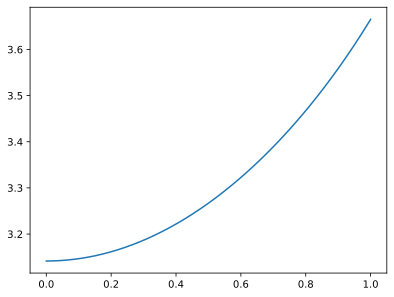

In [17]:
x_num = np.linspace(0, 1, 1000)
y_num = 2
plt.plot(x_num, expr_f(x_num, y_num))
plt.show()

In [18]:
F

x**2 + y*sin(z)

In [19]:
F.subs([(y, 3), (z, sm.pi/2)])

x**2 + 3

# Examples 

A falling object encounters a moving platform accelerating upwards: 

1. Object $h_0(t) = h_0 + v_0 t - \frac{1}{2} g t^2$
2. Platform $h_p(t) = v_p(t) + \frac{1}{2} q t^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $\displaystyle\dot{h}_0(t) = - \dot{h}_p(t)$

As seen from the exaples above, the **SymPy** solve function can be used if the equations are in the form $f(x) = 0$, so let's rearrange them:

1. $h_0(t) - h_p(t) = 0$
2. $\displaystyle\dot{h}_0(t) + \dot{h}_p(t) = 0$

In [20]:
t, h0, v0, g, vp, q = sm.symbols('t h_0 v_0 g v_p q', real=True, positive=True)


I can define the expressions using the previously defined symbols:

In [21]:
h0t = h0 - v0*t - sm.Rational(1,2) * g * t**2
h0dot = g*t - v0 
hpt = vp*t + sm.Rational(1,2) * q * t**2 
hpdot =  vp + q*t 

Define the equations

In [22]:
eq1 = h0t - hpt
eq2 = h0dot + hpdot

Solve the equations

In [23]:
sm.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [24]:
t_collision, v_initfall = sm.solve([eq1, eq2], [t, v0])[0]

In [25]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [26]:
t_collision

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

**What is the velocity when the object and platform collide?**

In [27]:
h0dot.subs([(t, t_collision), (v0, v_initfall)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [28]:
hpdot.subs([(t, t_collision), (v0, v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

## Calculus

In [29]:
x = sm.symbols('x')

### Limits

$$\displaystyle\lim_{x \to \pi} \sin(x/2 + \sin(x)) = 1$$

In [30]:
sm.limit(sm.sin(x/2 + sm.sin(x)), x, sm.pi)

1

### Derivatives

$$\displaystyle\frac{d}{dx} \left(\frac{1 + \sin(x)}{1 - \cos(x)} \right)^2$$

In [31]:
sm.diff(((1 + sm.sin(x))/(1 - sm.cos(x)))**2)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \displaystyle\frac{d}{dx} f(x + g(x))$$

In [32]:
f, g = sm.symbols('f g', cls=sm.Function)
g = g(x)
f = f(x + g)
f

f(x + g(x))

In [33]:
dfdx = sm.diff(f, x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [34]:
dfdx.subs([(g, sm.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

### Basic anti-derivatives

$$\displaystyle\int \csc(x) \cot(x) dx$$

In [35]:
sm.integrate(sm.csc(x) * sm.cot(x), x)

-1/sin(x)

### Definite integrals

$$\displaystyle\int_0^{\ln(4)} \frac{e^x}{\sqrt{e^{2x} + 9}} dx$$

In [36]:
sm.integrate((sm.exp(x) / sm.sqrt(sm.exp(2 * x) + 9)), (x, 0, sm.log(4)))

-asinh(1/3) + asinh(4/3)

$$ \displaystyle\int_1^t x^{10} e^x dx$$

In [37]:
sm.integrate((x**10 * sm.exp(x)), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Multivariabe calculus

In [38]:
x, y, z, u1, u2, u3, v1, v2, v3, t = sm.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

### Vectors and geometry

In [39]:
u = sm.Matrix([u1, u2, u3])
v = sm.Matrix([v1, v2, v3])

In [40]:
v

Matrix([
[v_1],
[v_2],
[v_3]])

**Addition and multiplication**

In [41]:
2*u + v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

Dot product

In [42]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

Cross product

In [43]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

Norm

In [44]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$$ \displaystyle proj_v(u) = \frac{u \cdot v}{|v|^2} v$$

In [45]:
proj_v_u = u.dot(v) /v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Lines: $ \displaystyle \vec{r}(t) = \vec{r}_0 + t \vec{v} $

In [46]:
r0 = sm.Matrix([1,1,1])
v = sm.Matrix([1,3,-1])
r = r0 + t*v 
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes: $ \vec{n} \cdot (P_0 - \langle x, y, z \rangle) = 0 $

In [47]:
P0 = sm.Matrix([4,4,8])
r = sm.Matrix([x,y,z])
n = sm.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

## Vector Calculus

### Vector derivatives

In [48]:
r = sm.Matrix([3*t, sm.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [49]:
sm.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [50]:
v = sm.diff(r, t)
a = sm.diff(v, t)
theta = sm.acos(v.dot(a) / (v.norm() * a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

Find $\theta(t = 6)$

In [51]:
theta.subs(t, 6).evalf()

0.251108015692338

### Vector integrals

In [52]:
r = sm.Matrix([sm.exp(t) * sm.cos(t), t**4, 1/(1 + t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [53]:
sm.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

Some integrals can't be solved analitically!

In [54]:
from scipy.integrate import quad_vec
r = sm.Matrix([sm.exp(t**2) * sm.cos(t)**3, sm.exp(-t**4), 1/(3 + t**2)])
r_num = sm.lambdify([t], r)
quad_vec(r_num, 0, 1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

## Partial derivatives

In [55]:
x, y, z = sm.symbols('x y z')

### Basics

Partial derivatives $\displaystyle \frac{\partial f}{\partial x}$ and $\displaystyle \frac{\partial f}{\partial y}$ of $f(x, y) = y^2 \sin(x + y)$

In [56]:
f = y**2 * sm.sin(x + y)
sm.diff(f, x)

y**2*cos(x + y)

Or even more complicated derivatives like $\displaystyle \frac{\partial^3 f}{\partial x \partial y^2}$

In [57]:
sm.diff(f, y, y, x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

### The Chain Rule

In [58]:
t = sm.symbols('t')
x, y, z, w, v = sm.symbols('x, y, z w v', cls=sm.Function)

+ Suppose $x, y, z$ are functions of $t$ 
+ $w$ is a function of $x, y, z$ i.e. $w = w(x, y, z)$

Find $\displaystyle \frac{d w}{d t}$

In [59]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)
w

w(x(t), y(t), z(t))

You can differentiate these abstract forms!

In [60]:
sm.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

And you can even do specific substitutions for the functions!

In [61]:
w1 = x**2 + sm.exp(y) * sm.sin(z)
sm.diff(w1, t).subs([(x, sm.sin(t)), 
                     (y, sm.cos(t)), 
                     (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Multiple integrals

For those rare cases where you can solve them symbolically!

$$ \displaystyle\int_0^1 \int_0^{1 - x^2} \int_3^{4 - x^2 -y^2} x dx dy dz$$

In [62]:
x, y, z = sm.symbols('x y z')
f = x 
sm.integrate(f, (z, 3, 4 - x**2 - y**2), (y, 0, 1 - x**2), (x, 0, 1))

1/8

# Lagrangian Mechanics

The simplified idea of Lagrangian mechanics is that you can express kinetic and potential energy as a function of the generalized coordinates and their derivatives. This function is called the Lagrangian. The equations of motion are then derived from the Euler-Lagrange equations.

$$ \displaystyle T = T(q, \dot{q})$$ 

$$ \displaystyle V = V(q, \dot{q})$$

$$ \displaystyle L = T - V$$

where $q$ are the generalized coordinates ($xyz$ of a point particle, $\theta$ for a pendulum, etc) and $\dot{q}$ are their derivatives.

The equation of motion $q(t)$ is then given by

$$ \displaystyle \frac{dL}{dq} - \frac{d}{dt} \frac{dL}{d \dot{q}} = 0$$

for all different generalized coordinates $q$ of the system. The equation above is called the Euler-Lagrange equation and gives a second order differential equation for all the different $q(t)$.

**Example:** Find the equations of motion (in the form of differential equations)

![](pendulum.svg)


Let $(x, y)$ be the position of the pendulum bob.

In [63]:
t, R, g, m1, m2 = sm.symbols('t R g m_1 m_2', real=True)
z, theta = sm.symbols(r'z \theta', cls=sm.Function)
z = z(t)
theta = theta(t)

zdot = sm.diff(z, t)
thetadot = sm.diff(theta, t)

Define the location of the pendulum bob

In [64]:
x = z + R * sm.sin(theta)
y = - R * sm.cos(theta)
y

-R*cos(\theta(t))

Kinetic and potential energy

In [65]:
T1 = sm.Rational(1,2) * m1 * sm.diff(z, t)**2 
T2 = sm.Rational(1,2) * m2 * (sm.diff(x, t)**2 + sm.diff(y, t)**2)
T = T1 + T2
V1 = 0
V2 = m2 * g * y 
V = V1 + V2

Define the Lagrangian

In [66]:
L = T - V

Get the Lagrangian equations of motion

In [67]:
LE1 = sm.diff(L, z) - sm.diff((sm.diff(L, zdot)), t)
LE2 = sm.diff(L, theta) - sm.diff((sm.diff(L, thetadot)), t)
LE1

-m_1*Derivative(z(t), (t, 2)) - m_2*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(z(t), (t, 2)))/2

Use the solve function to solve the differential equations

In [68]:
sols = sm.solve([LE1, LE2], [sm.diff(z, t, t), sm.diff(theta, t, t)])

Find $d^2 \theta / dt^2$ 

In [69]:
sols[sm.diff(theta, t, t)]

-R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)

Find $d^2 z / dt^2$ 

In [70]:
sols[sm.diff(z, t, t)]

R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)

With these generalized two second order differential equations, we can lambdify them and solve them numerically for any initial conditions.